# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [3]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
import scipy as sp
from skimage import io

from skimage import img_as_float
from matplotlib import cm
from skimage import img_as_ubyte
from scipy import signal



Pretty printing has been turned OFF


## Filtering 
**1.1**

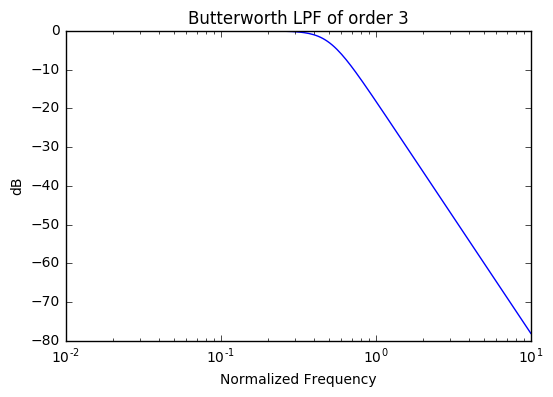

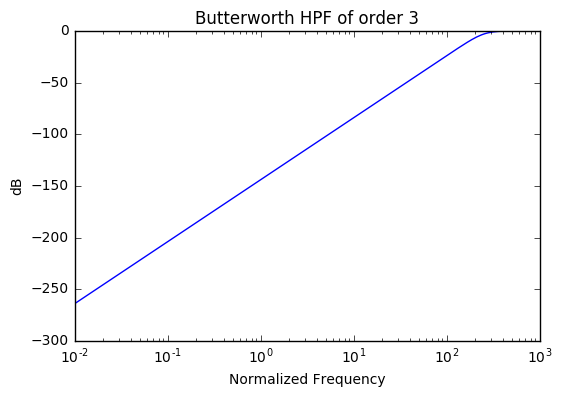

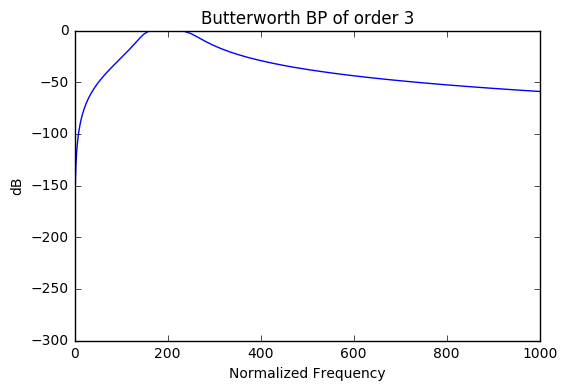

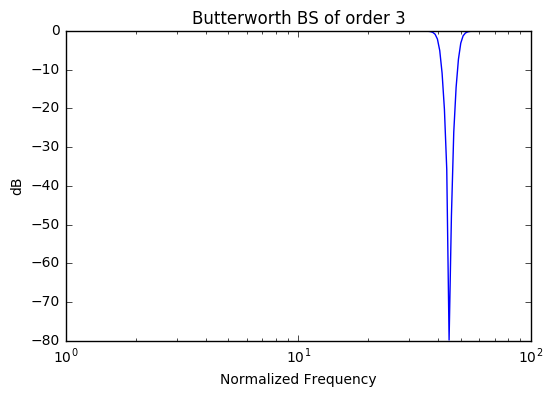

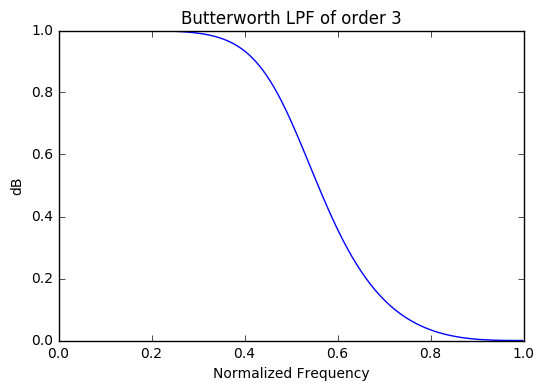

In [4]:



b, a = signal.butter(3, 0.5, 'low', analog=True)
w, h = signal.freqs(b, a)

plt.figure()
plt.title('Butterworth LPF of order 3')
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.ylabel('dB') 
plt.xlabel('Normalized Frequency')


c, d = signal.butter(3, 250, 'high', analog=True)
w1, h1 = signal.freqs(c, d)



e, f = signal.butter(3, [150, 250], 'band',True)
w2, h2 = signal.freqs(e, f)

g, h = signal.butter(3, [50,40], 'bandstop', analog=True)
w3, h3 = signal.freqs(g, h)




plt.figure()
plt.title('Butterworth HPF of order 3')
plt.semilogx(w1, 20 * np.log10(abs(h1)))
plt.ylabel('dB') 
plt.xlabel('Normalized Frequency')


plt.figure()
plt.title('Butterworth BP of order 3')
plt.plot(w2, 20 * np.log10(abs(h2)))
plt.ylabel('dB') 
plt.xlabel('Normalized Frequency')


plt.figure()
plt.title('Butterworth BS of order 3')
plt.semilogx(w3, 20 * np.log10(abs(h3)))
plt.ylabel('dB') 
plt.xlabel('Normalized Frequency')



#digital
b, a = signal.butter(3, 0.5, 'lowpass')
w, h = signal.freqz(b, a)

plt.figure()
plt.title('Butterworth LPF of order 3')
plt.plot(w/np.pi, abs(h))
plt.ylabel('dB') 
plt.xlabel('Normalized Frequency')











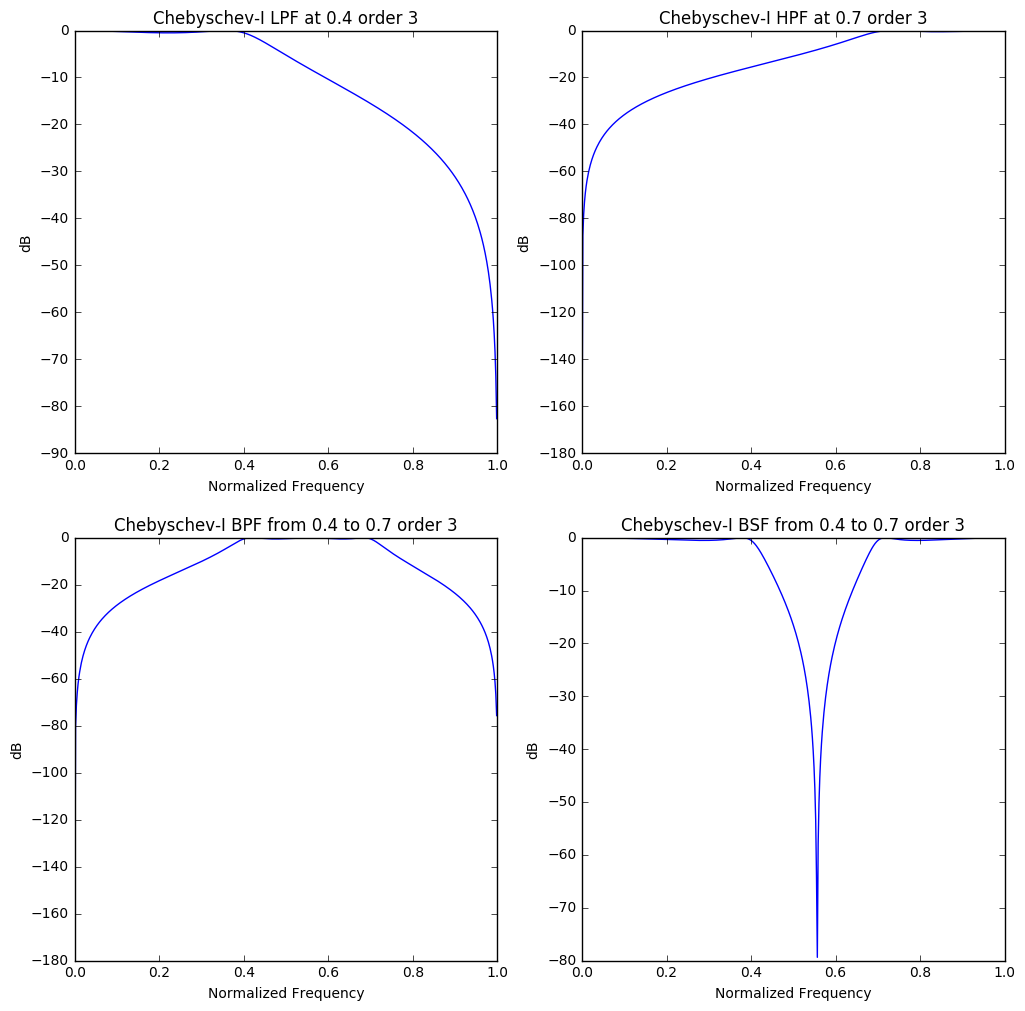

In [5]:
#Chebyschev!
filter_order = 3
w_cutoff = 0.4
w_pass = 0.7
max_ripple_db = 1.0

#lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’
b1,a1 = signal.cheby1(filter_order, max_ripple_db, w_cutoff, btype='lowpass')
w1,h1 = signal.freqz(b1, a1)

b2, a2 = signal.cheby1(filter_order, max_ripple_db, w_pass, btype='highpass')
w2, h2 = signal.freqz(b2, a2)

b3,a3 = signal.cheby1(filter_order, max_ripple_db, [w_cutoff, w_pass], btype='bandpass')
w3,h3 = signal.freqz(b3,a3)

b4,a4 = signal.cheby1(filter_order, max_ripple_db, [w_cutoff, w_pass], btype='bandstop')
w4,h4 = signal.freqz(b4,a4)

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title('Chebyschev-I LPF at 0.4 order 3')
plt.plot(w1/np.pi, 10*np.log10(np.abs(h1)))
plt.ylabel('dB')
plt.xlabel('Normalized Frequency')

plt.subplot(2,2,2)
plt.title('Chebyschev-I HPF at 0.7 order 3')
plt.plot(w2/np.pi, 10*np.log10(np.abs(h2)))
plt.ylabel('dB')
plt.xlabel('Normalized Frequency')

plt.subplot(2,2,3)
plt.title('Chebyschev-I BPF from 0.4 to 0.7 order 3')
plt.plot(w3/np.pi, 10*np.log10(np.abs(h3)))
plt.ylabel('dB')
plt.xlabel('Normalized Frequency')

plt.subplot(2,2,4)
plt.title('Chebyschev-I BSF from 0.4 to 0.7 order 3')
plt.plot(w4/np.pi, 10*np.log10(np.abs(h4)))
plt.ylabel('dB')
plt.xlabel('Normalized Frequency')

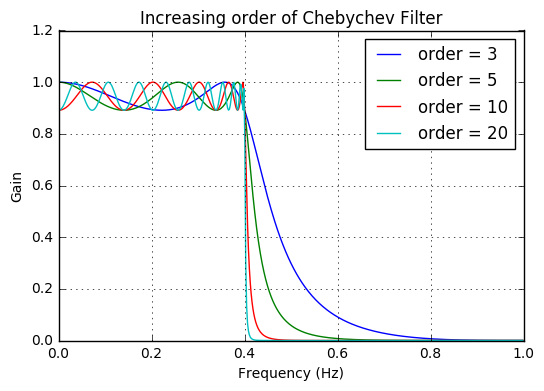

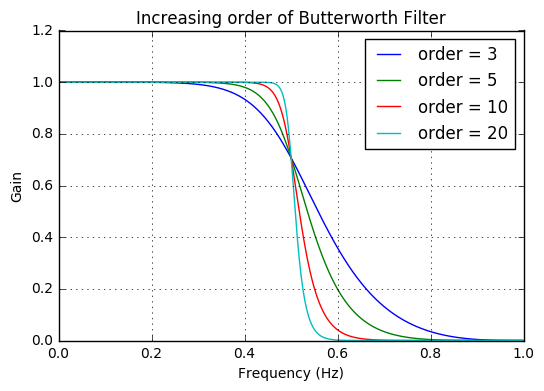

In [6]:
w_cutoff = 0.4
w_pass = 0.7
max_ripple_db = 1.0

for order in [3, 5, 10,20]:



    b1,a1 = signal.cheby1(order, max_ripple_db, w_cutoff, btype='lowpass')
    w1,h1 = signal.freqz(b1, a1)
    plt.plot(w1/ np.pi, abs(h1), label="order = %d" % order)
   
plt.title('Increasing order of Chebychev Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')
plt.figure()





for order1 in [3, 5, 10, 20]:
    b, a = signal.butter(order1, 0.5, 'low') 
    w, h = signal.freqz(b, a)
    plt.plot(w / np.pi,abs(h), label="order = %d" % order1)

plt.title('Increasing order of Butterworth Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')


**1.2**

## Recursive filter 

**2.1**

<Container object of 3 artists>

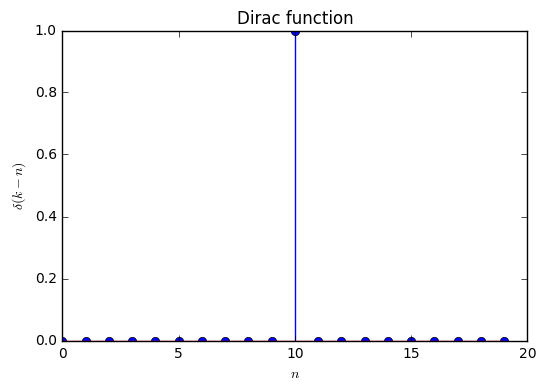

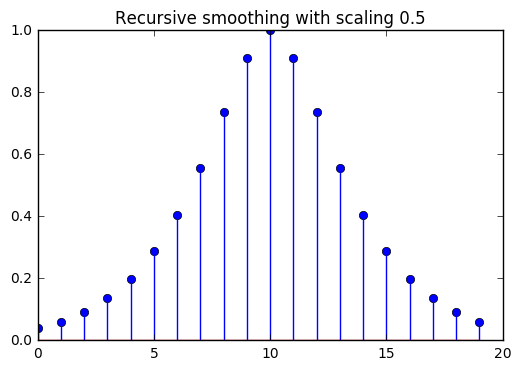

In [7]:
def dirac(n=0, N=20):
    if n > N -1:
        raise valueError('n should be inferior to N-1')
    #create the array
    s=np.zeros((N, ))
    # place the dirac
    s[n]=1
    
    return s


plt.stem(dirac(10))
plt.xlabel(r'$n$')
plt.ylabel(r'$\delta(k-n)$')
plt.title('Dirac function')


#recursive 
def smoothing(x, s=0.5, Ts=1):
    
    
    alpha = s*Ts
    a = np.exp(-alpha)
    

    #casual


    y_c = np.zeros(x.shape)
    y_c[0] = y_c[1]= 0 

    for k in range(2,x.size):

        y_c[k] = x[k] + a*(alpha - 1)*x[k-1] + 2*a*y_c[k-1] - a*a*y_c[k-2]


    #anti causal

    y_ac = np.zeros(x.shape)
    y_ac[:-0] = y_ac[:-1]= 0 

    for k in range(x.size -3, -1,-1):
        y_ac[k] = a*(alpha + 1)*x[k+1] - a*a*x[k+2] + 2*a*y_ac[k+1] - a*a*y_ac[k+2]
    
    y = y_c + y_ac        

    return y

x = dirac(10)
y = smoothing(x)
plt.figure()
plt.title('Recursive smoothing with scaling 0.5')
plt.stem(y)    
        
    


**2.2**

<Container object of 3 artists>

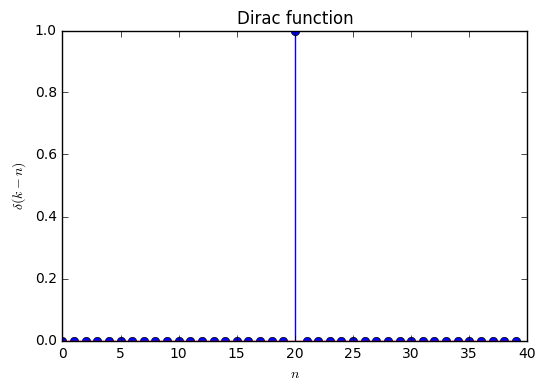

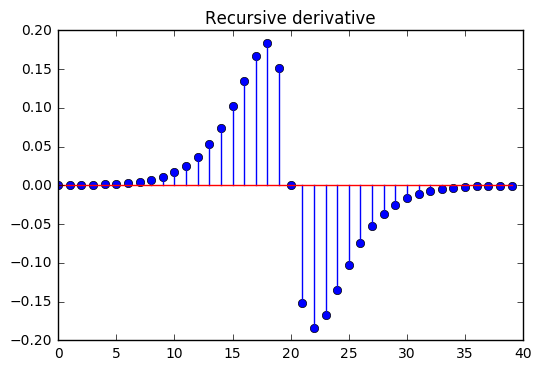

In [11]:
def dirac(n=0, N=40):
    if n > N -1:
        raise valueError('n should be inferior to N-1')
    #create the array
    s=np.zeros((N, ))
    # place the dirac
    s[n]=1
    
    return s


plt.stem(dirac(20))
plt.xlabel(r'$n$')
plt.ylabel(r'$\delta(k-n)$')
plt.title('Dirac function')


#recursive derivative
def derivative(x, s=0.5, Ts=1):
    
    
    alpha = s*Ts
    a = np.exp(-alpha)
    

    #casual


    y_c = np.zeros(x.shape)
    y_c[0] = y_c[1]= 0 

    for k in range(2,x.size):
         y_c[k] = -s*alpha*a*x[k-1] + 2*a*y_c[k-1] - a**2*y_c[k-2]


    #anti causal

    y_ac = np.zeros(x.shape)
    y_ac[:-0] = y_ac[:-1]= 0 

    for k in range(x.size -3, -1,-1):
        y_ac[k] = s*alpha*a*x[k+1] + 2*a*y_ac[k+1] - a**2*y_ac[k+2]
    
    y = y_c + y_ac        

    return y

x = dirac(20)
y = derivative(x)
plt.figure()
plt.title('Recursive derivative')
plt.stem(y)    


**2.4**

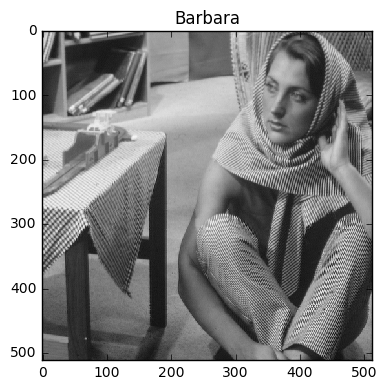

In [12]:
barbara = img_as_float(io.imread('./../images/barbara.gif'))
plt.figure()
plt.title("Barbara")
io.imshow(barbara)

**3.2** , **3.3**

In [14]:
s_smooth = 0.5
s_derivative = 0.5

im_row_smooth = np.zeros(barbara.shape)
print(im_row_smooth.shape)
for i in range(barbara.shape[0]):
    im_row_smooth[i,:] = smoothing(barbara[i,:], s=0.5, Ts=1)

(512, 512)


**3.4**

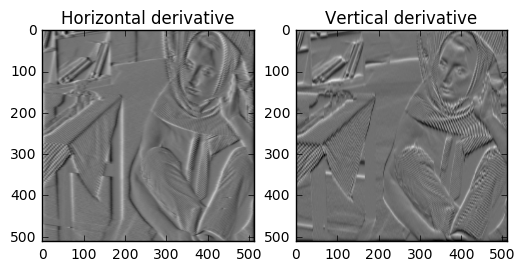

In [16]:
for i in range(barbara.shape[0]):
    im_row_smooth[i,:] = smoothing(barbara[i,:], s=0.5, Ts=1)

im_row_derivative = np.zeros(barbara.shape)
for i in range(barbara.shape[0]):
    im_row_derivative[i,:] = derivative(barbara[i,:], s=0.5, Ts=1)   
    
im_col_smooth = np.zeros(barbara.shape)
for j in range(barbara.shape[1]):
    im_col_smooth[:,j] = smoothing(barbara[:,j], s=0.5, Ts=1)
    
im_col_derivative = np.zeros(barbara.shape)    
for j in range(barbara.shape[1]):
    im_col_derivative[:,j] = derivative(barbara[:,j], s=0.5, Ts=1)   
    
plt.figure()
plt.subplot(1,2,1)
plt.imshow(im_row_derivative,cmap = 'gray')
plt.title('Horizontal derivative')
plt.subplot(1,2,2)
plt.imshow(im_col_derivative,cmap = 'gray')
plt.title('Vertical derivative')
